# Tune Measurement
---

This notebook is a template to check tune measurement online, during an MD. The idea is to open a window of 15 min before the present moment and to check the tune evolution at this particular moment, in order to deterine the effect of the wires. 

In [20]:
import cl2pd
from cl2pd import importData
from cl2pd import plotFunctions
from cl2pd import dotdict
from cl2pd import MDanalysis
from cl2pd import variablesDF

dotdict=dotdict.dotdict
pd=importData.pd     # is the pandas package
np=importData.np     # is the numpy package
cals=importData.cals # pytimber log class

import matplotlib.pyplot as plt
import itertools
get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'retina' # retina display
mySource='/eos/user/a/apoyet/SWAN_projects/2018/md2pd/Tune_Measurement.ipynb'
myTitle='Machine Development - Tune Measurements'

# Data from CALS
---

In [17]:
# Time definition

DELTA_T = 20.
#T2 = pd.Timestamp.now(tz='CET') # work now
T2 = pd.Timestamp('2018-04-28 18:39', tz='CET') #work during the test with pilot
T1 = T2 - pd.Timedelta(str(DELTA_T)+'m')

In [24]:
# Variables

TUNE_BBQ_VAR = list(variablesDF.LHC[variablesDF.LHC['Tag']=='Tune']['Variable'])
TUNE_FFT_VAR = cals.search('LHC.BQBBQ.CONTINUOUS.B%:FFT_DATA_%') #to be changed after cl2pd merged
CURRENT_VAR = list(variablesDF.LHC[variablesDF.LHC['Description']=='Wire current']['Variable'])

VAR = TUNE_BBQ_VAR+TUNE_FFT_VAR+CURRENT_VAR

In [25]:
# Download data from cals

RAW_DATA = importData.cals2pd(VAR,T1,T2)

# Plot Tune BBQ
---

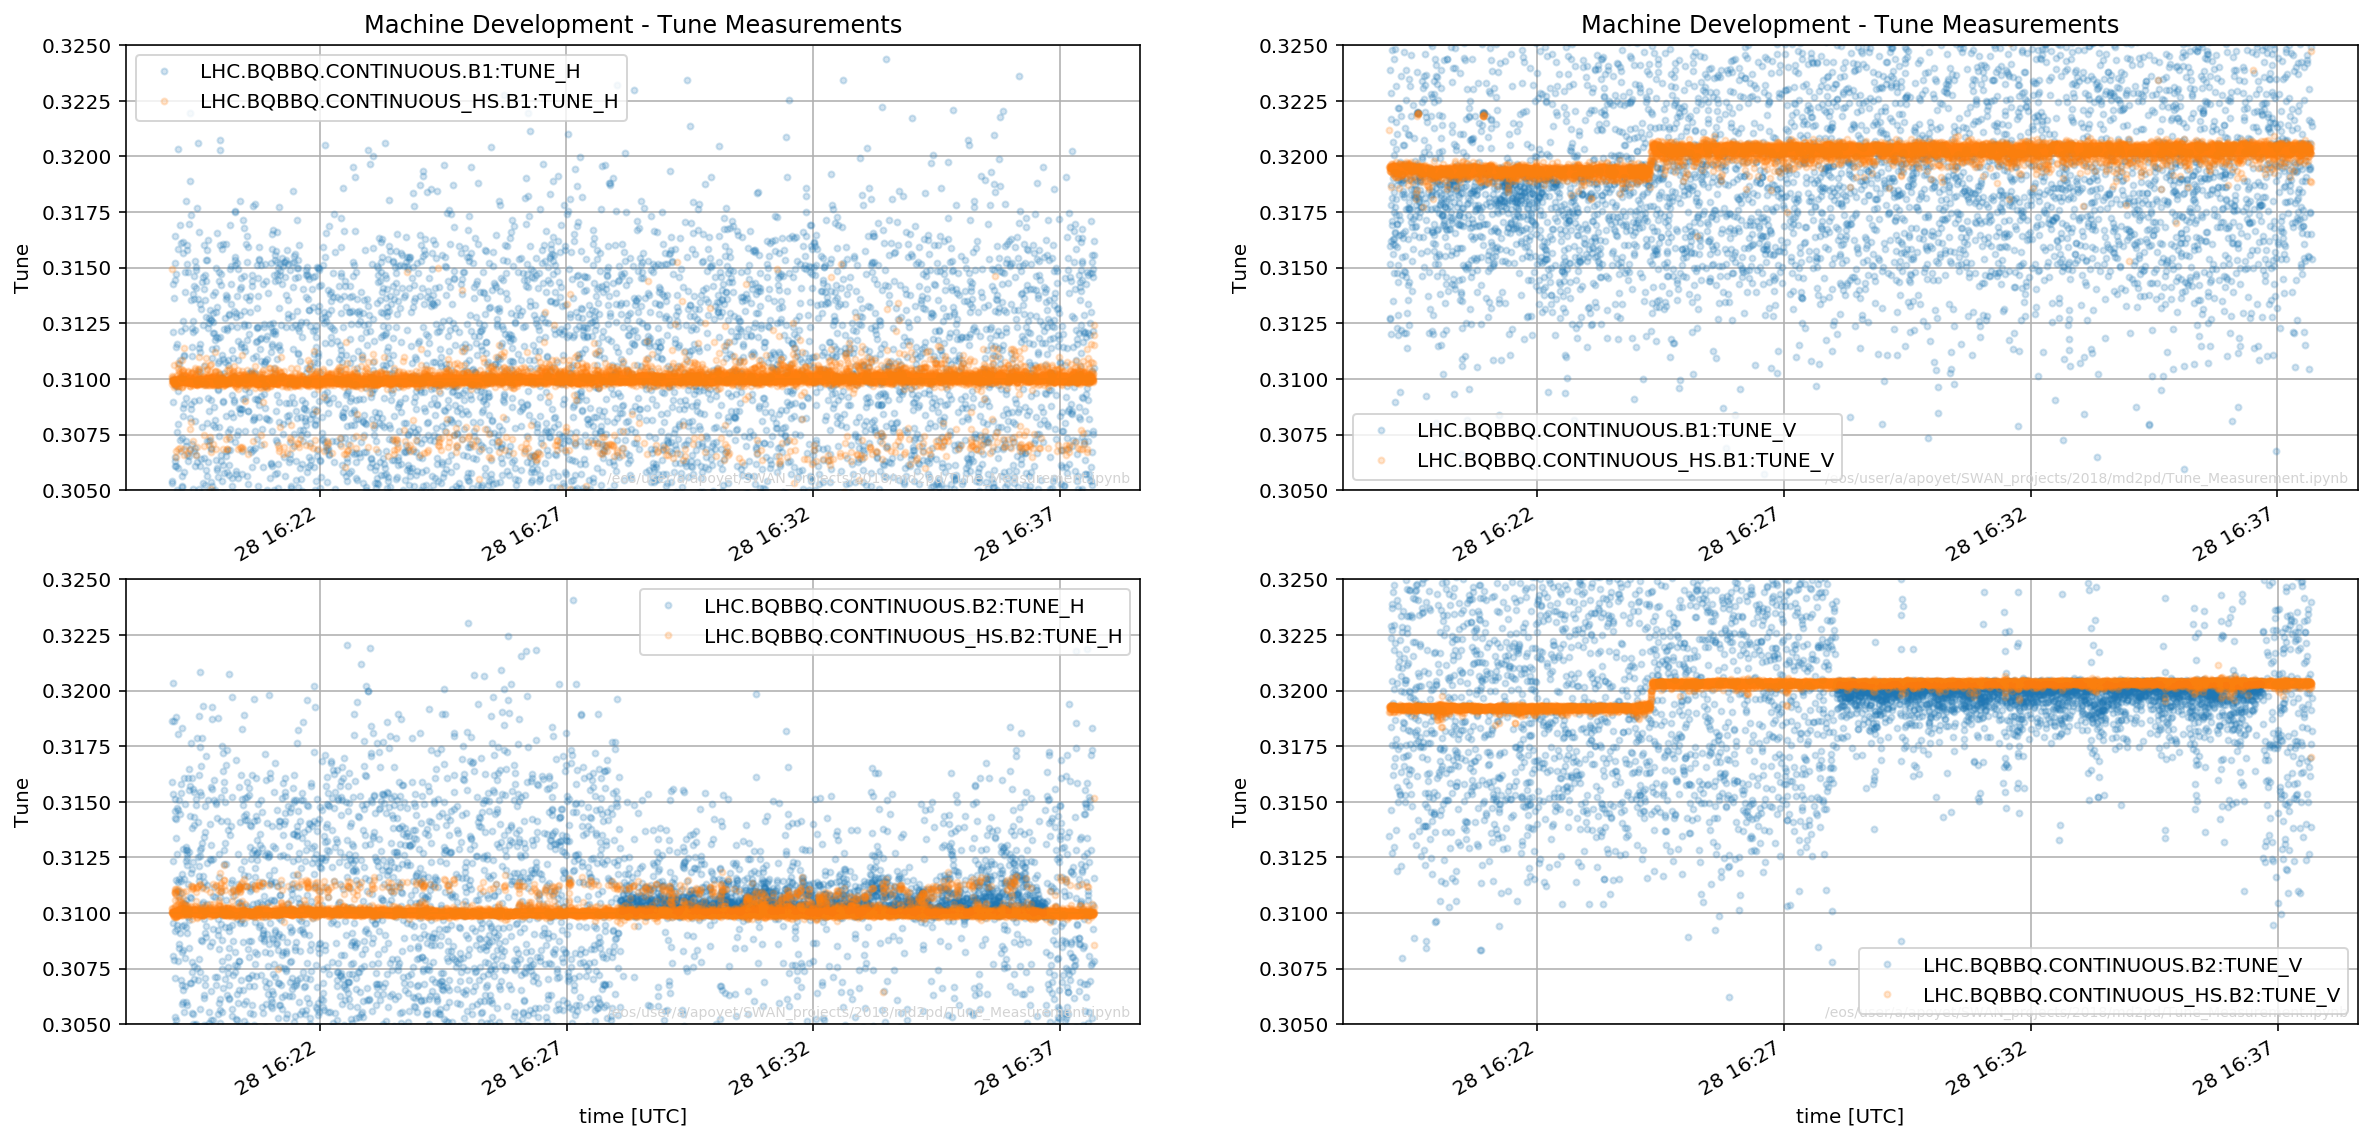

In [26]:
plt.figure(figsize=(20,10))
for beam,plane,index in zip(['B1','B1','B2','B2'],['H','V','H','V'],[1,2,3,4]):
    plt.subplot(2,2,index)
    RAW_DATA['LHC.BQBBQ.CONTINUOUS.'+beam+':TUNE_'+plane].dropna().plot(marker='.',ls='None',alpha=.2)
    RAW_DATA['LHC.BQBBQ.CONTINUOUS_HS.'+beam+':TUNE_'+plane].dropna().plot(marker='.',ls='None',alpha=.2)

    plt.ylim([.305,.325])
    if index in [3,4]:
        plt.xlabel('time [UTC]')
    plt.ylabel('Tune')
    plt.grid('on')
    if index in [1,2]:
        plt.title(myTitle)
    plt.legend(loc='best', frameon=True)
    plotFunctions.setSourcePlot(plt.gca(),mySource)

# Gated tune
---

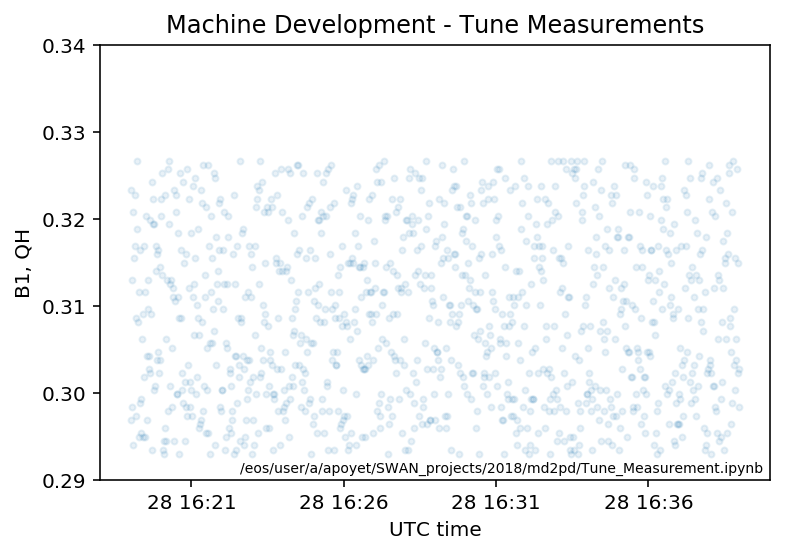

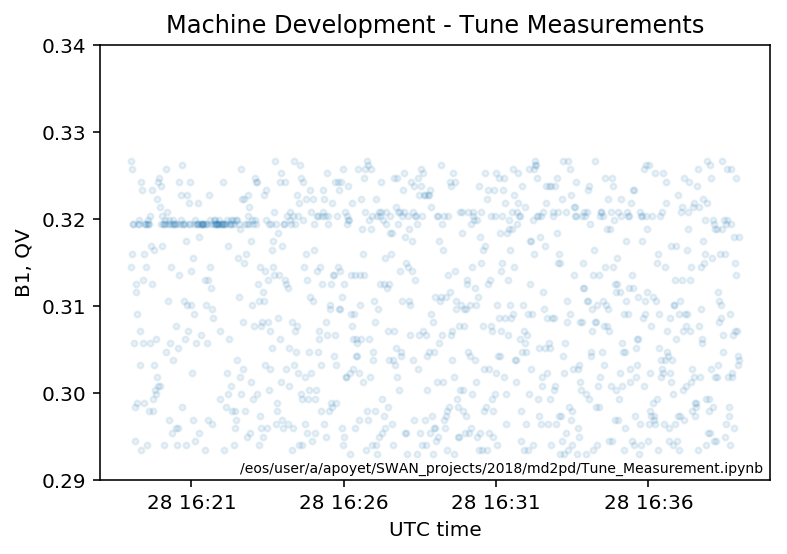

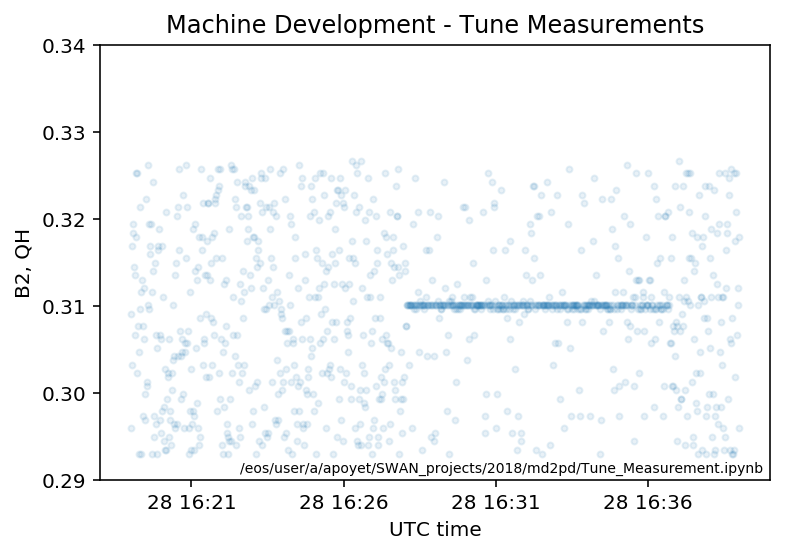

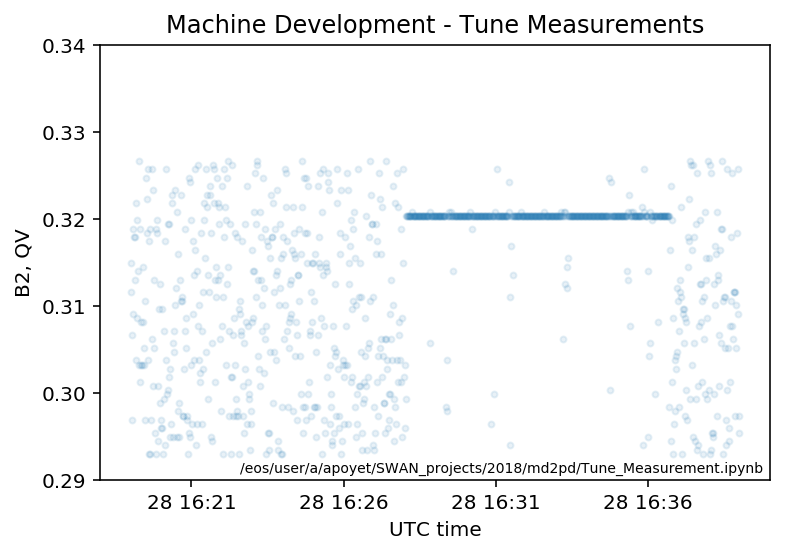

In [28]:
myDFFiltered=dotdict()
myDFFiltered.B1=dotdict()
myDFFiltered.B2=dotdict()

myDFFiltered.B1.H=RAW_DATA['LHC.BQBBQ.CONTINUOUS.B1:FFT_DATA_H'].dropna().copy()
myDFFiltered.B1.V=RAW_DATA['LHC.BQBBQ.CONTINUOUS.B1:FFT_DATA_V'].dropna().copy()

myDFFiltered.B2.H=RAW_DATA['LHC.BQBBQ.CONTINUOUS.B2:FFT_DATA_H'].dropna().copy()
myDFFiltered.B2.V=RAW_DATA['LHC.BQBBQ.CONTINUOUS.B2:FFT_DATA_V'].dropna().copy()

for beam, plane in itertools.product(['B1','B2'],['H','V']):
    myDFFiltered[beam][plane+'_tune']=myDFFiltered[beam][plane].apply(lambda x : np.where(np.array(x[600:670])==np.max(np.array(x[600:670])))[0][0]+600)
    
for beam, plane in itertools.product(['B1','B2'],['H','V']):
    plt.figure()
    plt.plot(myDFFiltered[beam][plane+'_tune']/1024.*.5,'.',alpha=.1)
    ylim=[.29,.34]
    plt.ylim(ylim)
    plt.title(myTitle)
    plotFunctions.setSourcePlot(plt.gca(), mySource,color='k')
    plt.xlabel('UTC time')
    plt.ylabel(beam+', Q'+plane)
    
